--------Degree Centrality for Junior Positions----------
               Location                 Degree
9          New York, NY    0.07169529499626587
4           Atlanta, GA    0.03360716952949963
3        Washington, DC    0.03286034353995519
10    San Francisco, CA   0.026885735623599704
5           Seattle, WA   0.022404779686333087
..                  ...                    ...
55    Saint Charles, MO  0.0007468259895444362
175      Tenleytown, DC  0.0007468259895444362
176  Jeffersonville, IN  0.0007468259895444362
177      Northbrook, IL  0.0007468259895444362
289          Skokie, IL  0.0007468259895444362

[290 rows x 2 columns]
--------------------------------------------------------
--------Degree Centrality for Senior Positions----------
                  Location                Degree
7             New York, NY  0.049999999999999996
0            Charlotte, NC   0.04285714285714286
2              Atlanta, GA   0.03571428571428571
20              Durham, NC   0.02857142857142

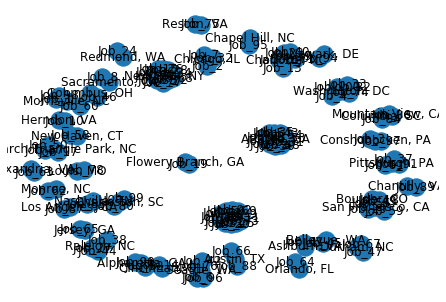

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar  5 18:46:54 2020

@author: jey19
"""
import scipy.stats as scs
import pandas as pd
import networkx  as nx
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2


# Function to Process result of Degree and Eigen vector Centrality
def process_df(deg):
    data_res = pd.DataFrame.from_dict(deg,orient='index')
    data_res = data_res.filter(regex=',', axis=0)
    data_res = data_res.rename(columns={0: "res"})
    data_res['res'] = data_res['res'].apply(str)
    data_res = data_res.res.str.split('  ',expand=True)
    data_final_loc = []
    data_final_deg = []
    for row in data_res.itertuples():
        data_final_loc.append(row.Index)
        data_final_deg.append(row._1)
    df_loc = pd.DataFrame(list(zip(data_final_loc, data_final_deg)), 
                   columns =['Location', 'Degree'])     
    df_loc = df_loc.sort_values(by='Degree',ascending=False)
    return(df_loc)

# Read CSV File
data = pd.read_csv("https://raw.githubusercontent.com/jey1987/DATA_620/master/Week5/Input%20File/Listings.csv")
# Classify based on Junior and Senior Positions
data_entry = data[data['JobType']=='Junior']
data_entry = data_entry.dropna()
data_senior = data[data['JobType']=='Senior']
data_senior = data_senior.dropna()

# Prepare Dataset for Chi-square test to compare two groups
data_entry_count = pd.DataFrame(data_entry[['location','count']])
data_entry_count = data_entry_count.groupby('location').agg('count').sort_values('count',ascending=False).head(5)
data_senior_count = pd.DataFrame(data_senior[['location','count']])
data_senior_count  = data_senior_count.groupby('location').agg('count').sort_values('count',ascending=False).head(5)
data_entry_count = data_entry_count['count'].values.tolist()
data_senior_count = data_senior_count['count'].values.tolist()
table = [data_entry_count,data_senior_count]

# Prepare Graphs for calculating Centrality
G_entry=nx.from_pandas_edgelist(data_entry,'location','Job')
G_senior=nx.from_pandas_edgelist(data_senior,'location','Job')
G_draw=nx.from_pandas_edgelist(data.head(100),'location','Job')
nx.draw(G_draw,with_labels=True)

# Calculate Centrality Measures
deg = nx.degree_centrality(G_entry)
deg_df_entry = process_df(deg)
print("--------Degree Centrality for Junior Positions----------")
print(deg_df_entry)
print("--------------------------------------------------------")
deg1 = nx.degree_centrality(G_senior)
deg_df_senior = process_df(deg1)
print("--------Degree Centrality for Senior Positions----------")
print(deg_df_senior)
print("--------------------------------------------------------")
eig = nx.eigenvector_centrality(G_entry)
eig_df_entry = process_df(eig)
print("--------Eigen Vector Centrality for Junior Positions----------")
print(eig_df_entry)
print("--------------------------------------------------------")
eig = nx.eigenvector_centrality_numpy(G_senior)
eig_df_senior = process_df(eig)
print("--------Eigen Vector Centrality for Senior Positions----------")
print(eig_df_senior)
print("--------------------------------------------------------")


# Conduct Chi-square Test
stat, p, dof, expected = chi2_contingency(table)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print("--------------------------------------------------------")
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
print("--------------------------------------------------------")

print("------------Result of Statistics Test----------------------")
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
print("--------------------------------------------------------")
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
print("--------------------------------------------------------")
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
print("--------------------------------------------------------")    
print("Since Null Hypothesis is Rejected we can say that the Junior Level position and Senior Level Positions doesnt have any relation to the location" )    
